###     SciPy是世界上著名的Python开源科学计算库，建立在Numpy之上。它增加的功能包括数值积分、最优化、统计和一些专用函数。

本篇文档包括以下内容：  
1、文件的输入/输出；  
2、统计；  
3、信号处理；  
4、最优化；  
5、插值

## 1 scipy.io文件的输入和输出

In [1]:
from scipy import io as spio
import numpy as np

In [2]:
# 保存文件
a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a})
#导入文件
data = spio.loadmat('file.mat', struct_as_record=True)
data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Mar 15 06:47:47 2017',
 '__version__': '1.0',
 'a': array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])}

载入txt文件：numpy.loadtxt()/numpy.savetxt()  
智能导入文本/csv文件：numpy.genfromtxt()/numpy.recfromcsv()  
高速，有效率但numpy特有的二进制格式：numpy.save()/numpy.load()

## 2 统计

### 2.1 分析随机数

In [3]:
import scipy.stats as stats

In [9]:
# 生成正态分析的随机数
generated = stats.norm.rvs(size = 900)
generated

array([  2.91995561e-01,   4.23394920e-01,   1.51373530e+00,
         4.20375684e-01,  -1.84395848e-01,   1.47141997e-02,
         1.30986792e+00,   3.02135017e-01,   5.65506403e-01,
        -2.50445465e-01,   7.14659560e-01,  -3.54103756e-01,
         8.18393064e-01,   1.01818146e+00,  -1.83431799e+00,
        -5.31036609e-01,   3.96669365e-01,  -1.17554640e+00,
         2.88267371e-01,  -8.37390352e-01,   3.67528321e-01,
         5.28392496e-01,   4.59818832e-01,  -4.75492118e-01,
        -1.03408508e-01,   5.99794845e-01,  -1.97344168e+00,
        -8.32686424e-01,   1.10844196e+00,  -8.58263017e-01,
         5.07691243e-01,  -3.39394230e-01,   6.35276755e-01,
         1.91207057e-01,  -3.75750184e-01,  -9.86426169e-01,
        -7.34533938e-01,   6.22772785e-01,  -2.39779856e-01,
        -1.13794163e+00,   1.15743826e+00,  -8.84113057e-01,
         5.34886518e-01,  -1.53075225e+00,  -1.38786559e-01,
        -8.42618235e-01,  -4.61052835e-02,  -9.29650255e-01,
        -2.02122984e-01,

In [10]:
# 用正态分布去拟合生成的数据，得到均值和标准差
Mean,std = stats.norm.fit(generated)
print('Mean = ',Mean,',std = ',std)

Mean =  -0.0530670389458 ,std =  0.977924988987


[偏度（skewnes）](http://baike.baidu.com/link?url=pYYIZK6nt71PTR3rzRhF-wuOZv0Wwr2hRysRQUMDhGPCivoUYwXqa2zvwbTTDbFlipFDP7-R-J0FnDOS2SImQ6OdFGGBqYvtza5Ot_1Eagq)描述的是概率分布的偏斜程度，我们需要做一个偏度检验。该检验有两个返回值，其中第二个返回值是p-value，即观察到的数据服从正态分布的概率，取值为0-1

In [11]:
stats.skewtest(generated)

SkewtestResult(statistic=0.045696219506681769, pvalue=0.96355237706019969)

我们有96%把握认为其服从正态分布

[峰度（kurtosis）](http://baike.baidu.com/link?url=TO4FcebhoNG72usc6Ea9rE2Jv4weUpHEqDiLIYN521_Pm04ZhVl1xcbYaMZy26olBDFEp-O_8wJxYXACqVofmNyHn9A1aIkH6iwwb1kzrru)描述的是概率分布的陡峭程度。该检验和偏度检验类似。

In [12]:
stats.kurtosistest(generated)

KurtosistestResult(statistic=-1.2269819622972704, pvalue=0.21982937052710516)

[正态性检验（normality test）](http://baike.baidu.com/link?url=zxoyO2axAS8j7z2IEL1ASapVZavj9Z2iLUaB0vEHzTfaCsOozm73wq7gbajDPMlZ5BJI3mxhsOPAvLaC8cuCkNhZi2nO8oBIiuYdkQbTkgPlW45GhYgzj9VNQSZlCpTC6vOLt4D9Cvpp5Thb6ulI1q)可以检验数据服从正太分布的程度。

In [13]:
stats.normaltest(generated)

NormaltestResult(statistic=1.507572880280063, pvalue=0.47058134698516707)

使用Scipy我们很方便的得到数据所在区域中某一百分比处的数值

In [14]:
# 例如得到95%处的数值
stats.scoreatpercentile(generated,95)

1.5560778745880202

In [15]:
# 同样，可以反过来，得到数值所在的百分比
stats.percentileofscore(generated,1)

86.222222222222229

使用matplot绘制生成数据的分布直方图

In [16]:
import matplotlib.pyplot as plt

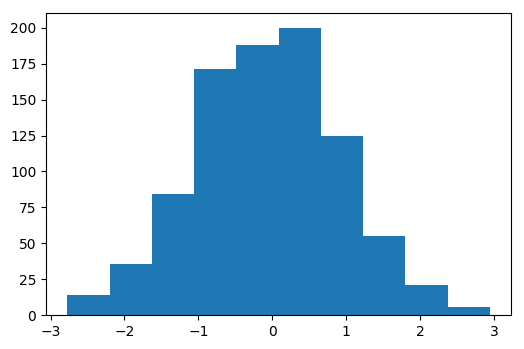

In [17]:
plt.hist(generated)
plt.show()

## 2.2 样本比对（比较股票对数收益率）

In [18]:
import numpy as np
price = get_price(['000001.XSHE','601398.XSHG'],start_date = '2016-01-01',end_date = '2017-01-01',fields='close')
price_001 = np.diff(np.log(np.array(price['000001.XSHE'])))
price_398 = np.diff(np.log(np.array(price['601398.XSHG'])))

均值检验可以检验两组不同的样本是否有相同的均值，返回值有两个，其中第二个为p-value,取值范围问为0~1

In [19]:
stats.ttest_ind(price_001,price_398)

Ttest_indResult(statistic=-0.28934838774733274, pvalue=0.77243868777092461)

Kolmogorov-Smirnov检验可以判断两组样本同分布的可能性

In [20]:
stats.ks_2samp(price_001,price_398)

Ks_2sampResult(statistic=0.094650205761316886, pvalue=0.21508957385193769)

在两支股票对数收益率的差值上运用Jarque-Bera正态性检验

In [21]:
stats.jarque_bera(price_001 -price_398)[-1]

0.0

## 3 信号处理

## 3.1 检验股价的线性趋势

In [22]:
from datetime import date,datetime,time
from scipy import signal
import pandas as pd
from matplotlib.dates import DateFormatter
from matplotlib.dates import DayLocator
from matplotlib.dates import MonthLocator
price = get_price('000001.XSHE',start_date = '2016-01-01',end_date = '2017-01-01',fields='close')

In [23]:
y = signal.detrend(price)
trend = pd.Series(np.array(price) - y,index = price.index)
trend

2016-01-04    8.358772
2016-01-05    8.363131
2016-01-06    8.367490
2016-01-07    8.371849
2016-01-08    8.376208
2016-01-11    8.380567
2016-01-12    8.384925
2016-01-13    8.389284
2016-01-14    8.393643
2016-01-15    8.398002
2016-01-18    8.402361
2016-01-19    8.406720
2016-01-20    8.411079
2016-01-21    8.415438
2016-01-22    8.419796
2016-01-25    8.424155
2016-01-26    8.428514
2016-01-27    8.432873
2016-01-28    8.437232
2016-01-29    8.441591
2016-02-01    8.445950
2016-02-02    8.450309
2016-02-03    8.454667
2016-02-04    8.459026
2016-02-05    8.463385
2016-02-15    8.467744
2016-02-16    8.472103
2016-02-17    8.476462
2016-02-18    8.480821
2016-02-19    8.485180
                ...   
2016-11-21    9.291571
2016-11-22    9.295930
2016-11-23    9.300289
2016-11-24    9.304648
2016-11-25    9.309007
2016-11-28    9.313366
2016-11-29    9.317725
2016-11-30    9.322083
2016-12-01    9.326442
2016-12-02    9.330801
2016-12-05    9.335160
2016-12-06    9.339519
2016-12-07 

In [24]:
# 可以看下面去除趋势的作用
help(signal.detrend)

Help on function detrend in module scipy.signal.signaltools:

detrend(data, axis=-1, type='linear', bp=0)
    Remove linear trend along axis from data.
    
    Parameters
    ----------
    data : array_like
        The input data.
    axis : int, optional
        The axis along which to detrend the data. By default this is the
        last axis (-1).
    type : {'linear', 'constant'}, optional
        The type of detrending. If ``type == 'linear'`` (default),
        the result of a linear least-squares fit to `data` is subtracted
        from `data`.
        If ``type == 'constant'``, only the mean of `data` is subtracted.
    bp : array_like of ints, optional
        A sequence of break points. If given, an individual linear fit is
        performed for each part of `data` between two break points.
        Break points are specified as indices into `data`.
    
    Returns
    -------
    ret : ndarray
        The detrended input data.
    
    Examples
    --------
    >>> from sc

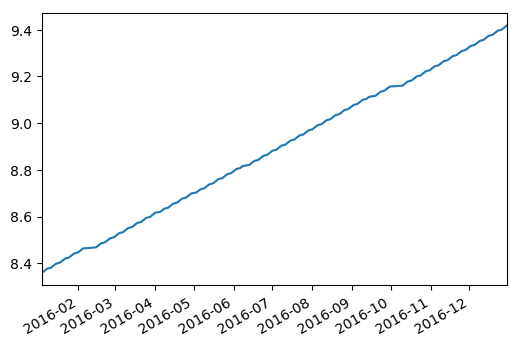

In [25]:
trend.plot()

## 3.2 傅里叶分析

### 对去除趋势后的信号进行滤波

In [26]:
from scipy import fftpack

In [27]:
# 运用傅里叶变换，得到信号的频谱
amps = np.abs(fftpack.fftshift(fftpack.rfft(y)))

In [28]:
# 过滤噪音，如果某一频率分量的大小低于最强分贝的10%，过滤
amps[amps < 0.1*amps.max()] = 0

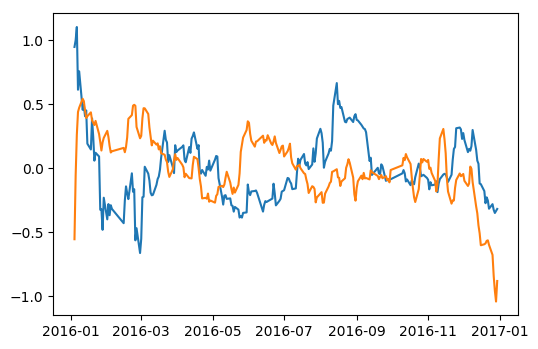

In [49]:
# 将过滤后的信号返回时域，并和去除趋势后的信号一起绘制出来
plt.plot(price.index,y,label = 'datrended')
plt.plot(price.index,-fftpack.irfft(fftpack.ifftshift(amps)),label = 'filtrend')

## 4 数学优化

&nbsp;&nbsp;优化算法尝试寻求某一问题的最优解，例如找到函数的最大值或最小值，函数可以是线性的也可以是非线性的。解可能也有一定的约束，例如大于1，。在scipy.optimize模块中提供了一些优化算法，包括最小二乘法。

### 4.1拟合正弦波

&nbsp;&nbsp;在上一章节，我们为去除趋势后的数据创建了一个简单的滤波器。我们可以回忆一下，一个正弦波优四个参数决定 Asin(ωx+φ)+k。  
A——振幅，当物体作轨迹符合正弦曲线的直线往复运动时，其值为行程的1/2。  
(ωx+φ)——相位，反映变量y所处的状态。  
φ——初相，x=0时的相位；反映在坐标系上则为图像的左右移动。  
k——偏距，反映在坐标系上则为图像的上移或下移。  
ω——角速度， 控制正弦周期(单位角度内震动的次数)。

In [29]:
# 定义正弦波模型
def residuals(p,y,x):
    A,k,theta,b = p
    err = y-A*np.sin(2*np.pi*k*x+theta)+b
    return err

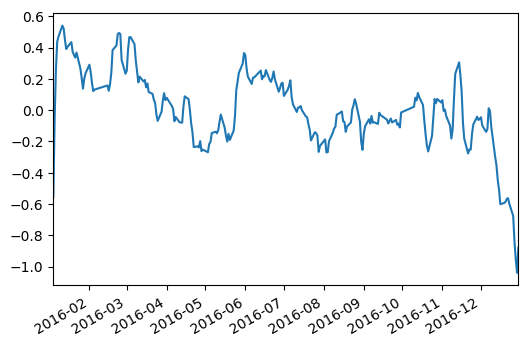

In [30]:
# 将滤波后的信号变换为时域
filtered = -fftpack.irfft(fftpack.ifftshift(amps))
pd.Series(filtered,index = price.index).plot()

In [31]:
N = len(filtered)
f = np.linspace(-N/2,N/2,N)
p0 = [filtered.max(),f[amps.argmax()]/(2*N),0,0]
p0

[0.54062009323472304, 0.013374485596707843, 0, 0]

In [32]:
# 调用leastsp函数
from scipy import optimize
plsq = optimize.leastsq(residuals,p0,args = (filtered,f))
p = plsq[0]

In [33]:
p

array([-0.21649664,  0.01171864, -0.76821357,  0.0065715 ])

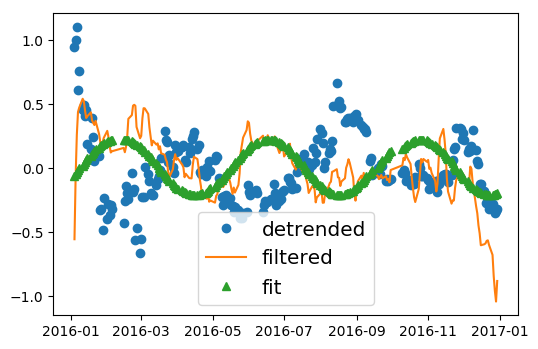

In [34]:
fig = plt.figure()
plt.plot(price.index,y,'o',label = 'detrended')
plt.plot(price.index,filtered,label = 'filtered')
plt.plot(price.index,p[0]*np.sin(2*np.pi*f*p[1]+p[2])+p[3],'^',label = 'fit')
plt.legend(prop = {'size':'x-large'})

## 4.2积分（以高斯积分为例）

高斯积分在概率论和连续傅里叶变换等的统一化等计算中有广泛的应用。在误差函数的定义中它也出现。虽然误差函数没有初等函数，但是高斯积分可以通过微积分学的手段解析求解。

In [35]:
from scipy import integrate
integrate.quad(lambda x: np.exp(-x**2),-np.inf,np.inf)

(1.7724538509055159, 1.4202636780944923e-08)

In [36]:
np.sqrt(np.pi)

1.7724538509055159

最常用的数值积分方法是quad,其它可用的积分方案有fixed_quad,quadrature,romberg.

## 插值

In [37]:
# 创建数据并添加噪音
x = np.linspace(-18,18,36)
noise = 0.1*np.random.random(len(x))
signal = np.sin(x) +noise

In [38]:
from scipy import interpolate
# 创造一个线性插值函数
interpreted = interpolate.interp1d(x,signal)
x2 = np.linspace(-18,18,180)
y = interpreted(x2)

In [39]:
# 执行前一步相同的操作，这里使三次插值
cubic = interpolate.interp1d(x,signal,kind = 'cubic')
y2 = cubic(x2)

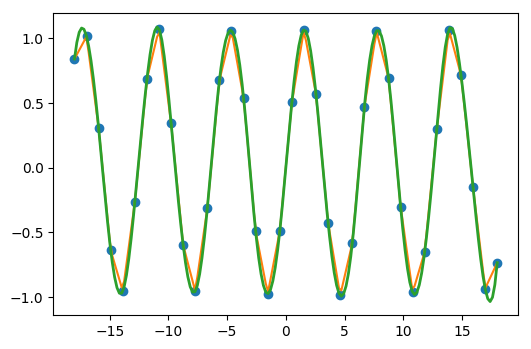

In [88]:
plt.plot(x,signal,'o',label = 'data')
plt.plot(x2,y,'-',label = 'lenear')
plt.plot(x2,y2,'-',lw = 2,label = 'cubic')